In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
df = pd.read_csv('df_k_means_metrics.csv', index_col=None)

In [3]:
df = df[df.columns[1:]]

In [4]:
df

,data_fraction_ID,number_of_clients_fractured,number_of_clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score,cluster_center
0,0,293215,325,0.473266,1.448680e+06,0.621588,[[151.34500244 -33.4153284 ]\n [152.93093959 -...
1,0,293215,326,0.475447,1.460719e+06,0.628884,[[150.87917682 -34.43862555]\n [152.9178915 -...
2,0,293215,327,0.461157,1.459328e+06,0.629465,[[150.44702835 -33.72014927]\n [152.70564215 -...
3,0,293215,328,0.472839,1.444253e+06,0.636648,[[151.12870859 -33.96094545]\n [152.84857804 -...
4,0,293215,329,0.467997,1.460519e+06,0.628930,[[153.43915965 -28.83887683]\n [150.57831957 -...
...,...,...,...,...,...,...,...
315,15,293215,340,0.472756,1.498637e+06,0.623354,[[147.83571325 -34.02915623]\n [151.28657754 -...
316,15,293215,341,0.475559,1.468164e+06,0.632238,[[150.88946992 -33.73241098]\n [153.45390501 -...
317,15,293215,342,0.463587,1.495430e+06,0.624823,[[151.01937654 -34.04176172]\n [152.91476894 -...
318,15,293215,343,0.468938,1.489103e+06,0.627186,[[151.23813724 -33.93897816]\n [151.11289434 -...


In [5]:
df['number_of_clusters'].max()

344

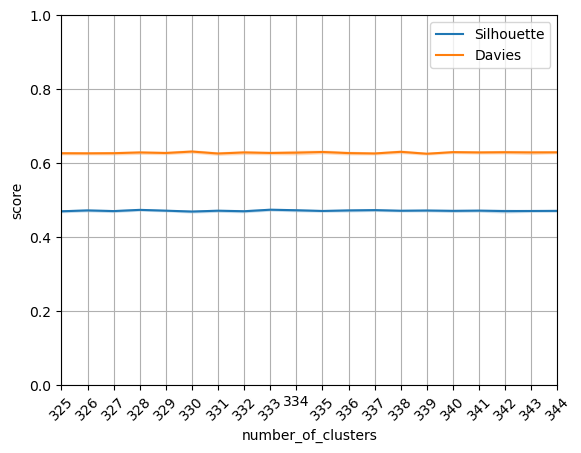

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=df, x=df.number_of_clusters, y=df.silhouette_score, label='Silhouette', ax=ax)
sns.lineplot(data=df, x=df.number_of_clusters, y=df.davies_bouldin_score, label='Davies', ax=ax)
plt.ylabel('score')
plt.ylim([0,1])
plt.xlim(df['number_of_clusters'].min(), df['number_of_clusters'].max())
plt.xticks(rotation=45)
ax.set_xticks(np.arange(df['number_of_clusters'].min(), df['number_of_clusters'].max()+1, 1))
plt.grid()
plt.show()

In [7]:
df['cluster_center'] = df['cluster_center'].str.replace('\n', ',')

In [8]:
df['cluster_center'] = df['cluster_center'].transform(lambda x: ' '.join(x.split())).str.replace(' ]', ']')

In [9]:
df['cluster_center'] = df['cluster_center'].str.replace(' ', ', ').str.replace(',,', ',').transform(lambda x: ast.literal_eval(x))

In [10]:
assert df['number_of_clients_fractured'].max()==df['number_of_clients_fractured'].min(), 'Asymmetric fractures detected'

In [11]:
df.sort_values(by=['silhouette_score'], ascending=False)

,data_fraction_ID,number_of_clients_fractured,number_of_clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score,cluster_center
115,5,293215,340,0.484983,1.486339e+06,0.627262,"[[152.14771716, -32.70979018], [151.17810833, ..."
307,15,293215,332,0.483536,1.501575e+06,0.609330,"[[150.8159066, -34.48223819], [152.95966898, -..."
32,1,293215,337,0.482354,1.459387e+06,0.634344,"[[151.10447321, -33.71075932], [151.11786323, ..."
131,6,293215,336,0.481669,1.465810e+06,0.626968,"[[151.08283399, -34.02714905], [153.10207163, ..."
48,2,293215,333,0.481667,1.463973e+06,0.628020,"[[151.12261468, -34.04215989], [152.55101507, ..."
...,...,...,...,...,...,...,...
51,2,293215,336,0.459693,1.464669e+06,0.630043,"[[150.78029984, -33.77746498], [153.17327537, ..."
6,0,293215,331,0.458794,1.437327e+06,0.638473,"[[151.00721267, -33.81185501], [153.51105218, ..."
217,10,293215,342,0.458049,1.467764e+06,0.620627,"[[151.32356462, -33.50969269], [152.93505848, ..."
225,11,293215,330,0.458008,1.396013e+06,0.634767,"[[151.36914438, -32.66977139], [151.01906421, ..."


In [12]:
analysis_df = df.drop(columns=['data_fraction_ID', 'number_of_clients_fractured', 'cluster_center']).groupby(['number_of_clusters']).mean()

In [13]:
analysis_df

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
number_of_clusters,,,
325,0.469623,1.442096e+06,0.626657
326,0.471994,1.447651e+06,0.626426
327,0.470177,1.450318e+06,0.626777
328,0.473479,1.445332e+06,0.628754
329,0.471313,1.450540e+06,0.627315
330,0.468907,1.448454e+06,0.631212
331,0.471184,1.451893e+06,0.625925
332,0.469737,1.452106e+06,0.628797
333,0.473886,1.459529e+06,0.627404


In [14]:
df.to_csv('df_k_means_metrics_fixed.csv')

In [15]:
df

,data_fraction_ID,number_of_clients_fractured,number_of_clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score,cluster_center
0,0,293215,325,0.473266,1.448680e+06,0.621588,"[[151.34500244, -33.4153284], [152.93093959, -..."
1,0,293215,326,0.475447,1.460719e+06,0.628884,"[[150.87917682, -34.43862555], [152.9178915, -..."
2,0,293215,327,0.461157,1.459328e+06,0.629465,"[[150.44702835, -33.72014927], [152.70564215, ..."
3,0,293215,328,0.472839,1.444253e+06,0.636648,"[[151.12870859, -33.96094545], [152.84857804, ..."
4,0,293215,329,0.467997,1.460519e+06,0.628930,"[[153.43915965, -28.83887683], [150.57831957, ..."
...,...,...,...,...,...,...,...
315,15,293215,340,0.472756,1.498637e+06,0.623354,"[[147.83571325, -34.02915623], [151.28657754, ..."
316,15,293215,341,0.475559,1.468164e+06,0.632238,"[[150.88946992, -33.73241098], [153.45390501, ..."
317,15,293215,342,0.463587,1.495430e+06,0.624823,"[[151.01937654, -34.04176172], [152.91476894, ..."
318,15,293215,343,0.468938,1.489103e+06,0.627186,"[[151.23813724, -33.93897816], [151.11289434, ..."


In [16]:
df_predicted_result = pd.DataFrame(list(df[df['number_of_clusters']==335].sample(1)['cluster_center'])[0], columns=[['lon', 'lat']])

In [17]:
df_predicted_result

,lon,lat
0,151.166423,-33.745994
1,152.912882,-29.696661
2,147.590479,-34.871245
3,150.659436,-32.380837
4,150.623005,-35.100784
...,...,...
330,149.081300,-33.657927
331,148.180434,-35.541215
332,149.270318,-33.543997
333,149.315925,-34.133651


In [18]:
df_predicted_result.to_csv('predicted_result_plot.csv')